In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def action(prob):
    return np.random.binomial(1, prob)

In [54]:
def init(n_init, p1, p2, p3):
    
    success_a1 = 0
    success_a2 = 0
    success_a3 = 0
    tries_array = [0, 0, 0]
    for ii_init in range(0, n_init):
        success_a1 += action(p1)
        success_a2 += action(p2)
        success_a3 += action(p3)
        
        tries_array[0] += 1
        tries_array[1] += 1
        tries_array[2] += 1
        
        
    return([success_a1, success_a2, success_a3], tries_array)
        


In [55]:
np.argmax([0.5, 0.5])

0

In [64]:
init_v = init(1, 0.95, 0.9, 0.1)

print(init_v)
print(np.array(init_v[0])/np.array(init_v[1]))

([1, 1, 0], [1, 1, 1])
[1. 1. 0.]


In [113]:
def greedy(prob_array, success_array_init, tries_array_init, t):

    
    best_prob = np.max(prob_array)
    
    success_array = success_array_init
    tries_array = tries_array_init
    results_array = np.array(success_array)/np.array(tries_array)
    
    #print(success_array)
    #print(tries_array)
    #print(results_array)
    #print('')
    regret_array = []
    regret_sum = 0
    for ii in range(0, t):
        best_init_index = np.argmax(results_array)
        
        regret = best_prob - prob_array[best_init_index]
        regret_sum += regret
        regret_array.append(regret_sum)
        
        print('best index = ' + str(best_init_index))
        
        #in greedy we always chose the best action...
        action_result = action(prob_array[best_init_index])
        #print('action result = ' + str(action_result))
        
        success_array[best_init_index] += action_result
        tries_array[best_init_index] += 1
        
        results_array = np.array(success_array)/np.array(tries_array)
        
        
        
        #print(success_array)
        #print(tries_array)
        print(results_array)
        #print('')
        
    return success_array, tries_array, results_array, regret_array
        
        
    
    
    
    
    

In [118]:
init_v = init(1, 0.95, 0.9, 0.1)

greedy_out = greedy([0.95, 0.9, 0.1], init_v[0], init_v[1], 1000)

best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[1. 1. 0.]
best index = 0
[0.96666667 1.         0.        ]
best index = 1
[0.96666667 0.5        0.        ]
best index = 0
[0.96774194 0.5        0.        ]
best index = 0
[0.9375 0.5    0.    ]
best index = 0
[0.93939394 0.5        0.        ]
best index = 0
[0.94117647 0.5    

/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_14102/1109092766.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(0, 1000), np.log(np.cumsum(greedy_out[3])))


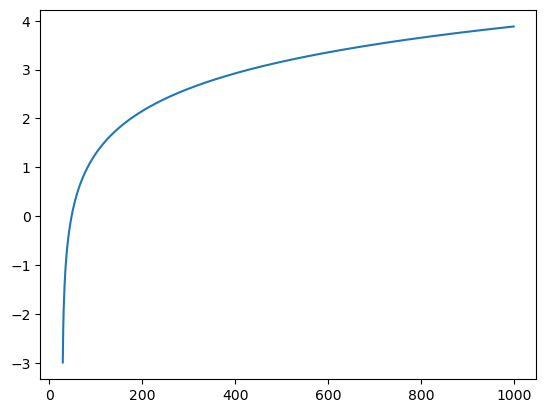

In [121]:
plt.plot(np.arange(0, 1000), np.log(np.cumsum(greedy_out[3])))